<a href="https://colab.research.google.com/github/eyalhizmi/Machine-learning-methods-for-fMRI-signal-analysis/blob/main/final_project_fmri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nilearn 
# Download the standalone module if not using BrainIAK
from urllib.request import urlretrieve
urlretrieve('https://github.com/eyalhizmi/Machine-learning-methods-for-fMRI-signal-analysis/'
            'raw/main/tutorials/isc_standalone.py', 'isc_standalone.py');

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 5.4 MB/s 


In [ ]:
from isc_standalone import (isc, isfc,
                            compute_summary_statistic, load_images,squareform_isfc,
                            load_boolean_mask, mask_images,
                            MaskedMultiSubjectData) 
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

import seaborn as sns
from scipy.stats import norm, pearsonr, zscore
from scipy.spatial.distance import squareform
import nibabel as nib

In [ ]:
!wget -O movies_4rest_fmri_7T.mat https://www.dropbox.com/sh/4t21s5e2hz21r51/AABqx_CFpSOJJ76Np7oypCw2a/4movies_4rest_fmri_7T.mat?dl=0
!wget -O net_assignment.mat https://www.dropbox.com/sh/4t21s5e2hz21r51/AABCVCIKVxzl-hLgNQ1bwkUya/net_assignment.mat?dl=0

--2022-11-09 08:47:54--  https://www.dropbox.com/sh/4t21s5e2hz21r51/AABqx_CFpSOJJ76Np7oypCw2a/4movies_4rest_fmri_7T.mat?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/4t21s5e2hz21r51/AABqx_CFpSOJJ76Np7oypCw2a/4movies_4rest_fmri_7T.mat [following]
--2022-11-09 08:47:54--  https://www.dropbox.com/sh/raw/4t21s5e2hz21r51/AABqx_CFpSOJJ76Np7oypCw2a/4movies_4rest_fmri_7T.mat
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc77abcea10531215e68f14a9c9b.dl.dropboxusercontent.com/cd/0/inline/BwbzaYcQQrCvsXCJz609MRxw3K8vJta5lVcK-CoNYFmbwcxnPsmhrYsFv6R2Rv872MlU-Gryde_m0mDeep-hPJFZoqu87PmdvjViR0NWi98vPVEWecBxmdwJh8gVpKSnKoxnfRPJkA29i_qF7XpwQtI3-ATRhu004iXNhGCwhmtORg/file# [following]
--2022-11-09 08:47:54--  https://uc77abcea10531215e68f1

In [ ]:
data_ = loadmat('movies_4rest_fmri_7T.mat')
data = data_['splitData']


network_ = loadmat('net_assignment.mat')
network = network_['net_assignment']

In [ ]:
movie_1 = data[0,1]
movie_1.shape

(181, 718, 227)

In [ ]:
network_type = network==8
network_type = network_type.squeeze().astype(bool)
roi = movie_1[:,network_type,:]
roi = roi.transpose(0,2,1)
roi.shape
roi_num = roi.shape[2]

In [ ]:
data = [roi[subj,:] for subj in range(len(roi))]

subject_num = len(data)

iscs = isc(data, pairwise=True)
iscs.shape

# Check shape of output ISC values
print(f"ISC values shape = {iscs.shape} \ni.e., {iscs.shape[0]} "
      f"pairs and {iscs.shape[1]} voxels"
      f"\nMinimum ISC = {np.amin(iscs):.3f}; "
      f"maximum ISC = {np.amax(iscs):.3f}")



ISC values shape = (16290, 46) 
i.e., 16290 pairs and 46 voxels
Minimum ISC = -0.440; maximum ISC = 0.894


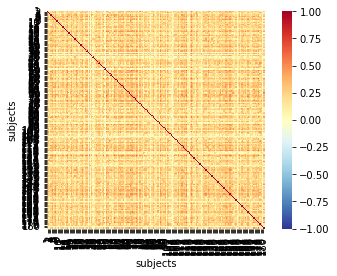

In [ ]:
isc_matrix = squareform(iscs[:,2])
np.fill_diagonal(isc_matrix, 1)
sns.heatmap(isc_matrix, cmap="RdYlBu_r", vmin=-1, vmax=1, square=True, 
            xticklabels=range(1, subject_num), yticklabels=range(1, subject_num))
plt.xlabel('subjects')
plt.ylabel('subjects')
plt.show()

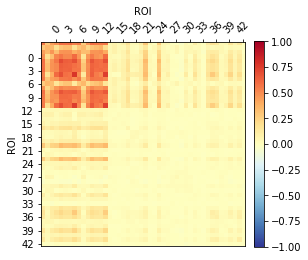

In [ ]:
# Recompute mean ISFCs
isfcs, iscs = isfc(data, pairwise=False, summary_statistic='mean',
                   vectorize_isfcs=True)

# Convert these to a square representation
isfcs = squareform_isfc(isfcs, iscs)

# Visual mean ISFC matrix
plt.matshow(isfcs, cmap="RdYlBu_r", vmin=-1, vmax=1)
plt.grid(False)
plt.xticks(np.arange(0, roi_num, 3)[1:], np.arange(0, roi_num, 3),
           rotation=45)
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')
plt.yticks(np.arange(0, roi_num, 3)[1:], np.arange(0, roi_num, 3))
plt.xlabel('ROI')
plt.ylabel('ROI')
ax = plt.gca()
plt.colorbar(fraction=0.046, pad=0.04);